## Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

[My EDA Report](https://millie1310.github.io/EDA_reports/ydata/MySteps_report.html)

### Loading and Unserstanding the Data

In [ ]:
df = pd.read_csv("MySteps.csv")

In [ ]:
print(df.head())

   Full_date   Day_Name  steps Activity  distance  runDistance  calories  \
0   1-May-16     Sunday   3869      Low      2651            0       244   
1   8-May-16     Sunday   4088      Low      3119            0       197   
2   9-May-16     Monday   1958      Low      1266            0       134   
3  11-May-16  Wednesday   2569      Low      1661            0       198   
4  13-May-16     Friday   4276      Low      2809            0       251   

   Year Month Name  DayType Full_date (Quarter)  Full_date (Month Index)  \
0  2016        May  Weekend                Qtr2                        5   
1  2016        May  Weekend                Qtr2                        5   
2  2016        May  Weekday                Qtr2                        5   
3  2016        May  Weekday                Qtr2                        5   
4  2016        May  Weekday                Qtr2                        5   

  Full_date (Month)  deepSleepTime  shallowSleepTime  wakeTime       start  \
0       

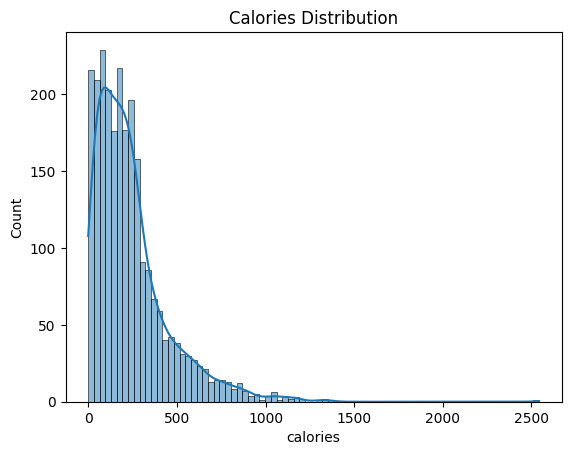

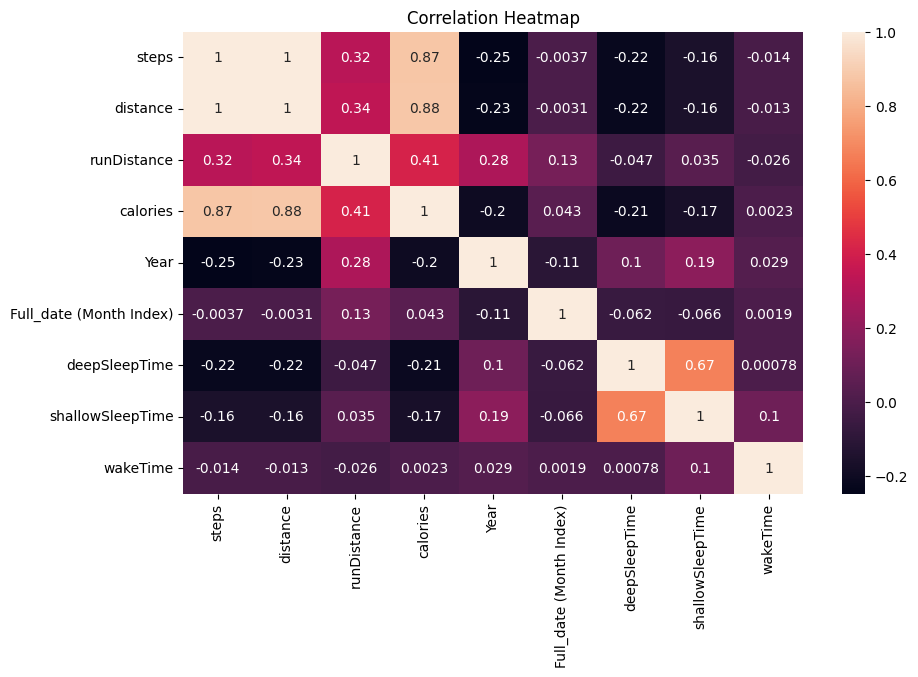

In [ ]:
# Distribution of the target variable (calories)
sns.histplot(df['calories'], kde=True)
plt.title('Calories Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
# Prepare features (X) and target (y)
X = df.drop(columns=['calories', 'Full_date', 'start', 'stop'])  # Drop non-predictive columns
y = df['calories']


In [ ]:
# Categorical features to encode
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Preprocessing pipeline for categorical features
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')


In [ ]:
# Define the Gradient Boosting model with your specified parameters
gb_model = GradientBoostingRegressor(
    alpha=0.9,
    ccp_alpha=0.0,
    criterion='friedman_mse',
    init=None,
    learning_rate=0.1,
    loss='squared_error',
    max_depth=3,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_iter_no_change=None,
    random_state=123,
    subsample=1.0,
    tol=0.0001,
    validation_fraction=0.1,
    verbose=0,
    warm_start=False
)

# Create a pipeline with preprocessing and the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', gb_model)
])


### Splitting the Data

In [ ]:


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)


### Evaluation Metrics

In [ ]:


# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# Root Mean Squared Error
rmse = mse ** 0.5
# R-squared score
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")


MAE: 29.77
MSE: 9169.15
RMSE: 95.76
R2 Score: 0.8243


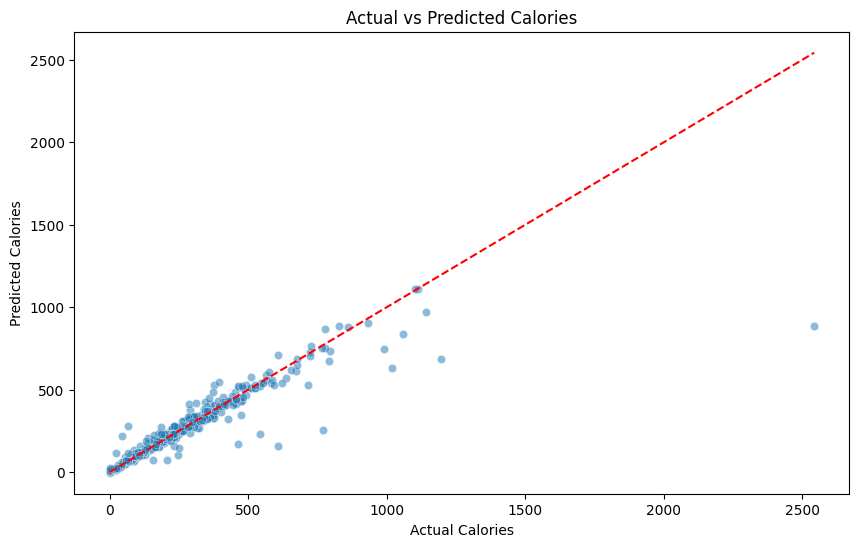

In [ ]:
### Actual vs Predicted

# Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()

### Summary of the model

In [ ]:


print("Model Summary:")
print(f"Features used: {X.columns.tolist()}")
print(f"Total number of samples: {len(df)}")
print(f"Train-Test split: 80%-20%")
print(f"Model performance (R2 score): {r2:.4f}")

Model Summary:
Features used: ['Day_Name', 'steps', 'Activity', 'distance', 'runDistance', 'Year', 'Month Name', 'DayType', 'Full_date (Quarter)', 'Full_date (Month Index)', 'Full_date (Month)', 'deepSleepTime', 'shallowSleepTime', 'wakeTime']
Total number of samples: 2454
Train-Test split: 80%-20%
Model performance (R2 score): 0.8243


## Thank you